In [1]:
import numpy as np
import os
import pandas as pd
import csv
from matplotlib import pyplot as plt
import matplotlib.pyplot as pyplot
import PIL.Image as Image
from PIL import ImageOps
import glob
import math

In [2]:
df = pd.read_table("data7_10.txt")

In [3]:
print(df)

    Mass  Fore  Bicep  Chest  Neck  Shoulder  Waist  Height  Calf  Thigh  Head
0   77.0  28.5   33.5  100.0  38.5     114.0   85.0   178.0  37.5   53.0  58.0
1   85.5  29.5   36.5  107.0  39.0     119.0   90.5   187.0  40.0   52.0  59.0
2   63.0  25.0   31.0   94.0  36.5     102.0   80.5   175.0  33.0   49.0  57.0
3   80.5  28.5   34.0  104.0  39.0     114.0   91.5   183.0  38.0   50.0  60.0
4   79.5  28.5   36.5  107.0  39.0     114.0   92.0   174.0  40.0   53.0  59.0
5   94.0  30.5   38.0  112.0  39.0     121.0  101.0   180.0  39.5   57.5  59.0
6   66.0  26.5   29.0   93.0  35.0     105.0   76.0   177.5  38.5   50.0  58.5
7   69.0  27.0   31.0   95.0  37.0     108.0   84.0   182.5  36.0   49.0  60.0
8   65.0  26.5   29.0   93.0  35.0     112.0   74.0   178.5  34.0   47.0  55.5
9   58.0  26.5   31.0   96.0  35.0     103.0   76.0   168.5  35.0   46.0  58.0
10  69.5  28.5   37.0  109.5  39.0     118.0   80.0   170.0  38.0   50.0  58.5
11  73.0  27.5   33.0  102.0  38.5     113.0   86.0 

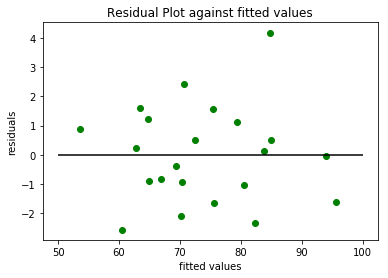

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
df = pd.read_table("data7_10.txt")
y=df['Mass']

df = df.drop(['Mass'],axis=1)

x=df

#x,_,y,_ = train_test_split(x,y,test_size=0.0)

reg = linear_model.LinearRegression()

reg.fit(x,y)
x_r = reg.predict(x)
y_r = y- reg.predict(x)

plt.scatter(x_r ,y_r ,color ='green')
plt.hlines(y = 0, xmin = 50, xmax = 100)
plt.title('Residual Plot against fitted values')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show() 

r_square = np.var(reg.predict(x)) / np.var(y)

In [5]:
r_square

0.97721066174132543

In [66]:
r_square

0.976473058722882

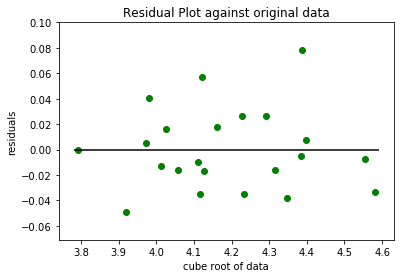

In [19]:
df = pd.read_table("data7_10.txt")
y= np.cbrt(df['Mass'])
df = df.drop(['Mass'],axis=1)
df.columns = range(df.shape[1]) #removing header
x = df 
reg = linear_model.LinearRegression()
#x = np.power(x, (1/3.0))
#y = np.power(y, (1/3.0))

reg.fit(x,y)
x_r = reg.predict(x)
y_r = y - reg.predict(x)
plt.scatter(x_r ,y_r ,color ='green')
plt.hlines(y = 0, xmin = min(x_r)-0.01, xmax = max(x_r)+0.01)
plt.title('Residual Plot: cube root of Mass in original coordinates')
plt.xlabel('cube root of data')
plt.ylabel('residuals')
plt.show()  
r_square = np.var(x_r) / np.var(y)

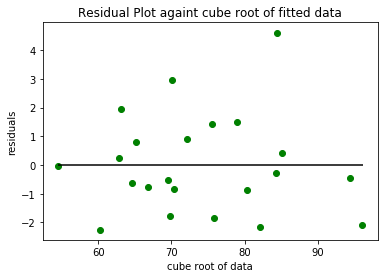

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
df = pd.read_table("data7_10.txt")
y_o = np.asarray(df['Mass'])
y= np.cbrt(df['Mass'])
df = df.drop(['Mass'],axis=1)
df.columns = range(df.shape[1]) #removing header
x = df 
reg = linear_model.LinearRegression()
#x = np.power(x, (1/3.0))
#y = np.power(y, (1/3.0))

reg.fit(x,y)
x_r = np.power(reg.predict(x), 3)
y_r = y_o  - np.power(reg.predict(x), 3.0)

plt.scatter(x_r ,y_r ,color ='green')
plt.hlines(y = 0, xmin = min(x_r)-0.01, xmax = max(x_r)+0.01)
plt.title('Residual Plot: cube root of Mass in original coordinates')
plt.xlabel('cube root of data')
plt.ylabel('residuals')
plt.show()  
r_square = np.var(x_r) / np.var(y)

In [14]:
reg.predict(x)

array([ 1.61716731,  1.63851115,  1.58395217,  1.6247102 ,  1.62802284,
        1.65790061,  1.59109011,  1.6021407 ,  1.58443624,  1.57651471,
        1.6040527 ,  1.60819668,  1.61781985,  1.60241753,  1.63191402,
        1.59485433,  1.5601808 ,  1.58885482,  1.63703794,  1.60292022,
        1.63660574,  1.66111817])

In [68]:
r_square

0.9749728597801842

Both residual plots has a good random pattern...